# Test 6.0


## Theory Question


Question 1: What is Transfer Learning and why is it important?

Question 2: Define Auxiliary Branches, Naive Inception Module, and Dimension Reduction with mathematics.

Question 3: Define Reduction Block and specify which architecture it uses.







## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

Loaded images shape: (1000, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1000,) /n Images with Folder name


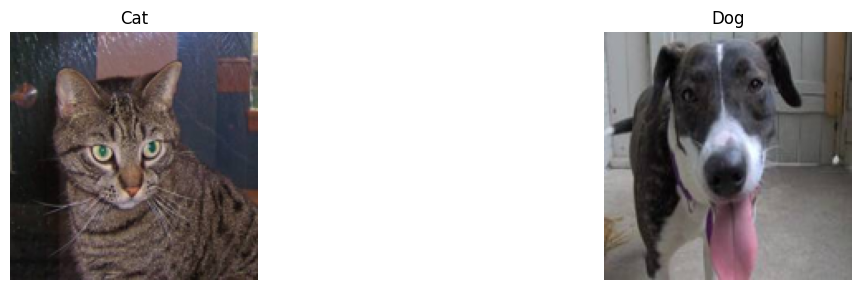

In [46]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/cats and Dog'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))
                image = np.array(image) / 255.0
                images.append(image)
                labels.append(i)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
train_validation_dir = '/content/drive/MyDrive/cats and Dog'

IMAGE_SIZE=224
BATCH_SIZE=128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)


In [50]:
train_generator = train_datagen.flow_from_directory(
    train_validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)

Found 901 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
7/7 [==============================] - 100s 14s/step - loss: 0.6967 - accuracy: 0.5356 - val_loss: 0.6856 - val_accuracy: 0.5413
Epoch 2/10
7/7 [==============================] - 117s 17s/step - loss: 0.6920 - accuracy: 0.5420 - val_loss: 0.6887 - val_accuracy: 0.5502
Epoch 3/10
7/7 [==============================] - 111s 16s/step - loss: 0.6913 - accuracy: 0.5433 - val_loss: 0.6819 - val_accuracy: 0.5513
Epoch 4/10
7/7 [==============================] - 113s 16s/step - loss: 0.6795 - accuracy: 0.5446 - val_loss: 0.6894 - val_accuracy: 0.5402
Epoch 5/10
7/7 [==============================] - 121s 17s/step - loss: 0.6872 - accuracy: 0.5625 - val_loss: 0.6854 - val_accuracy: 0.6004
Epoch 6/10
7/7 [==============================] - 116s 17s/step - loss: 0.6874 - accuracy: 0.5679 - val_loss: 0.6741 - val_accuracy: 0.5502
Epoch 7/10
7/7 [==============================] - 112s 19s/step - loss: 0.6796 - accuracy: 0.5666 - val_loss: 0.6716 - val_accuracy: 0.5446
Epoch 8/10
7/7 [====

In [54]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


8/8 [==============================] - 30s 4s/step - loss: 0.6743 - accuracy: 0.6230
Validation Loss: 0.6743
Validation Accuracy: 0.6230


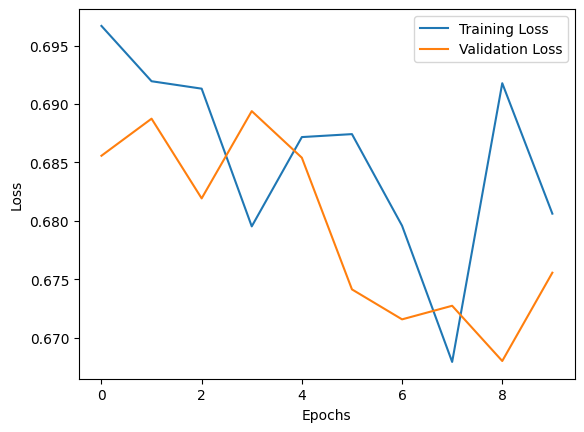

In [55]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
model.save('cats_and_dogs_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

1.   List item
2.   List item



    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters with 3 X 3 X 3 kernal filters only on each layer )
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20